In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

In [52]:
#Parameters
MH = 125.10 # Higgs mass in GeV
vS = 1000.0 # Singlet VEV in GeV
vH = 246.0 # Higgs VEV in GeV
lambdaH = 0.14 # Higgs quartic coupling

In [4]:
def width(mI, mS, theta):
    return (
        np.sqrt(MH**2 * (MH**2 - 4 * mI**2)) *
        (
            -(
                vH * np.cos(theta) * (MH**2 * np.cos(theta)**2 + mS**2 * np.sin(theta)**2)
            ) / vS**2
            + (
                np.sin(theta) * (
                    -mI**2 * vS**2
                    - MH**2 * vH**2 * np.cos(theta)**2
                    - mS**2 * vS**2 * np.cos(theta)**2
                    - mS**2 * vH**2 * np.sin(theta)**2
                    - MH**2 * vS**2 * np.sin(theta)**2
                )
            ) / (2. * vS**3)
            - (
                3 * np.sin(theta) * (
                    mI**2 * vS**2
                    + MH**2 * vH**2 * np.cos(theta)**2
                    - mS**2 * vS**2 * np.cos(theta)**2
                    + mS**2 * vH**2 * np.sin(theta)**2
                    - MH**2 * vS**2 * np.sin(theta)**2
                )
            ) / (2. * vS**3)
        )**2
    ) / (32. * np.pi * abs(MH)**3)

In [5]:
htonp1sig = pd.read_csv('htonp1sig.csv', sep=';')
htonp2sig = pd.read_csv('htonp2sig.csv', sep=';')



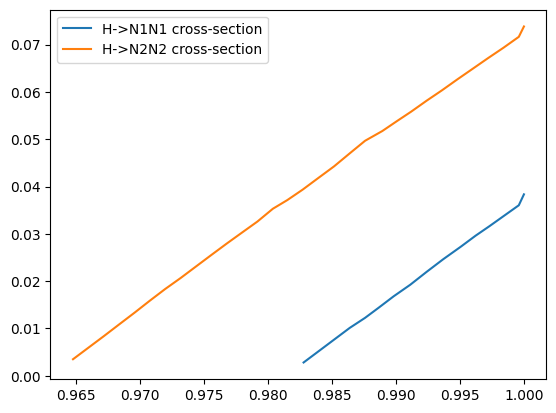

In [7]:
plt.plot(htonp1sig.iloc[:,0], htonp1sig.iloc[:,1], label='H->N1N1 cross-section')
plt.plot(htonp2sig.iloc[:,0], htonp2sig.iloc[:,1], label='H->N2N2 cross-section')
#plt.plot(htonp1sig.iloc[:,0], br1sig_func(htonp1sig.iloc[:,0]), label='Br(H->N1N1)')
plt.legend()

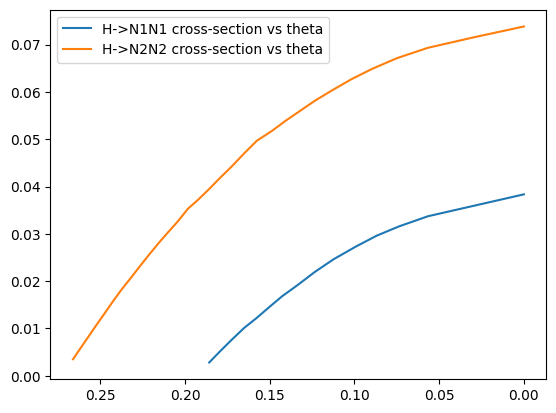

In [10]:
#Let me try to change from cos(theta) to theta in the data.

x1sig = np.arccos(htonp1sig.iloc[:,0])
x2sig = np.arccos(htonp2sig.iloc[:,0])

newh1sig = pd.DataFrame({'theta': x1sig, 'branching_ratio': htonp1sig.iloc[:,1]})
newh2sig = pd.DataFrame({'theta': x2sig, 'branching_ratio': htonp2sig.iloc[:,1]})

br1sig_func = interp1d(newh1sig['theta'], newh1sig['branching_ratio'], kind='linear')
br2sig_func = interp1d(newh2sig['theta'], newh2sig['branching_ratio'], kind='linear')

plt.plot(newh1sig['theta'], newh1sig['branching_ratio'], label='H->N1N1 cross-section vs theta')
plt.plot(newh2sig['theta'], newh2sig['branching_ratio'], label='H->N2N2 cross-section vs theta')
plt.gca().invert_xaxis()
plt.legend()

In [11]:
def branching(mI, mS, theta):
    return width(mI, mS, theta) / (width(mI, mS, theta) + np.cos(theta)**2 * 0.00407)  # SM Higgs width at 125 GeV is 4.07 MeV

C:\Users\steve\AppData\Local\Temp\ipykernel_7632\128195099.py:3: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(MH**2 * (MH**2 - 4 * mI**2)) *
C:\Users\steve\AppData\Local\Temp\ipykernel_7632\1739434988.py:11: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  solucao_mI = fsolve(lower_bound, x0 = 62.4)
C:\Users\steve\AppData\Local\Temp\ipykernel_7632\1739434988.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mI_boundary[i] = solucao_mI


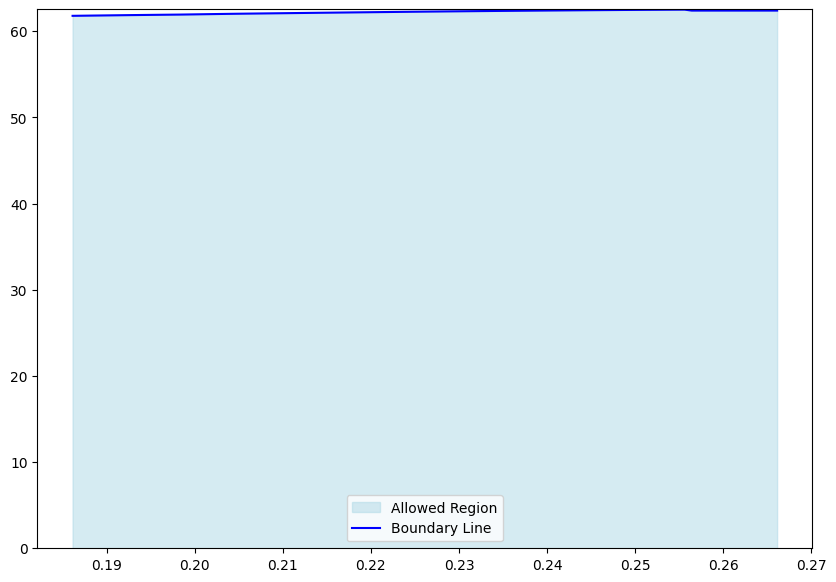

In [46]:
#Let us try to set bounds!

theta_steps = np.linspace(newh2sig.iloc[0,0], newh2sig.iloc[15,0], 100)
mI_boundary = np.full_like(theta_steps, np.nan)
def equality(mI, theta):
        return branching(mI, 100, theta) - br2sig_func(theta)

for i, theta in enumerate(theta_steps):
    def lower_bound(mI):
        return equality(mI, theta)
    solucao_mI = fsolve(lower_bound, x0 = 62.4)
    mI_boundary[i] = solucao_mI
    


fig, ax = plt.subplots(figsize=(10,7))

ax.set_ylim(0, MH/2)
y_min, y_max = 0, mI_boundary
ax.fill_between(theta_steps, y_min, y_max, where=~np.isnan(mI_boundary), color='lightblue', alpha=0.5, label='Allowed Region')
ax.plot(theta_steps, mI_boundary, color='blue', label='Boundary Line')
ax.legend()

In [43]:
mI_boundary

array([62.4       , 62.4       , 62.4       , 62.4       , 62.4       ,
       62.4       , 62.4       , 62.4       , 62.4       , 62.4       ,
       62.4       , 62.4       , 62.4       , 62.50877738, 62.50486164,
       62.50077071, 62.49650476, 62.49206395, 62.48752088, 62.48285754,
       62.47802867, 62.47303435, 62.46787465, 62.46254964, 62.45701989,
       62.45129456, 62.44539987, 62.43933581, 62.43310234, 62.42669939,
       62.42028604, 62.41390093, 62.40736374, 62.4006744 , 62.39383282,
       62.38683892, 62.37982621, 62.37319154, 62.36643128, 62.35954535,
       62.35253368, 62.34539619, 62.33813279, 62.33052756, 62.32273907,
       62.31481483, 62.30675468, 62.29855846, 62.29022599, 62.281821  ,
       62.27344531, 62.26494023, 62.2563056 , 62.24754123, 62.23864693,
       62.22962249, 62.2206676 , 62.21172401, 62.20265938, 62.19347353,
       62.18416627, 62.17473738, 62.16518668, 62.15593948, 62.14672567,
       62.13740394, 62.12797412, 62.11843603, 62.1087895 , 62.09

In [28]:
lower_bound(62.5)

np.float64(-0.028735887082162806)

In [ ]:
br1sig_func(0.1)

array(0.02714945)

In [ ]:
newh2sig

,theta,branching_ratio
0,0.266115,0.003500
1,0.261513,0.005934
2,0.256830,0.008367
3,0.252063,0.010857
4,0.247206,0.013330
5,0.242253,0.015882
6,0.237199,0.018355
7,0.232037,0.020665
8,0.226760,0.023105
9,0.221359,0.025540


In [58]:
def vev(mS,theta):
    return (2 * np.cos(theta)**4) * (MH**2 * np.cos(theta)**2 + mS**2 * np.sin(theta)**2) / (4 * lambdaH)

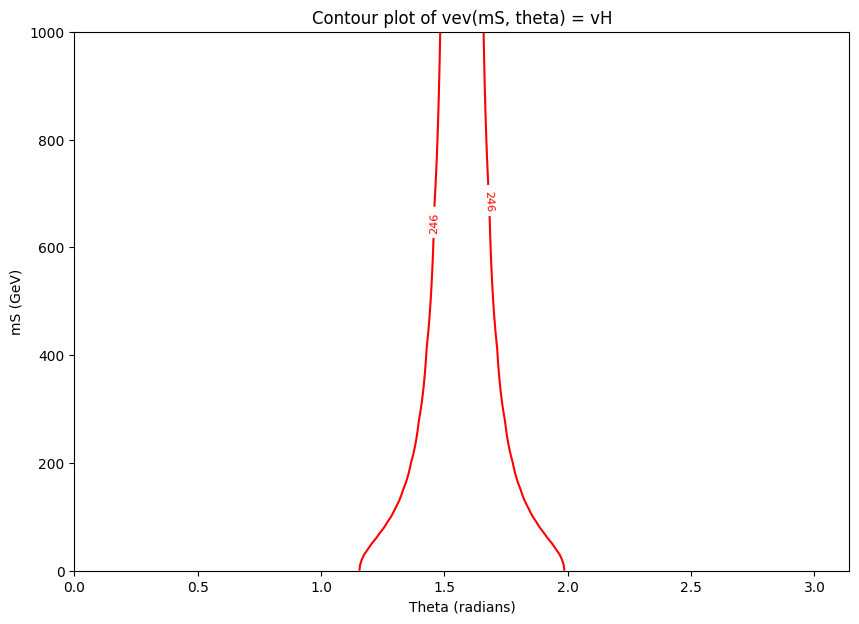

In [59]:
ms_values = np.linspace(0, 1000, 100)
theta_values = np.linspace(0, np.pi, 100)

X,Y = np.meshgrid(theta_values, ms_values)
Z = vev(Y, X)
c = vH

fig, ax = plt.subplots(figsize=(10,7))
contour = ax.contour(X, Y, Z, levels=[vH], colors='red')
ax.clabel(contour, inline=True, fontsize=8)
ax.set_xlabel('Theta (radians)')
ax.set_ylabel('mS (GeV)')
ax.set_title('Contour plot of vev(mS, theta) = vH')
plt.show()
